# REGRESIÓN

# **Descripción del conjunto de datos**  
Este conjunto de datos contiene información sobre las características de los pacientes y su influencia en el tiempo que tarda un medicamento en hacer efecto.  

Hay **11 características**, que son las siguientes:  

- **age** – edad del paciente (18-90 años)  
- **weight_kg** – peso corporal en kilogramos (50-120 kg)  
- **bmi** – índice de masa corporal calculado a partir del peso y la altura  
- **dose_mg** – dosis administrada del medicamento en miligramos (50-500 mg)  
- **administration_route** – vía de administración del medicamento (`oral`, `intravenous`, `intramuscular`, `subcutaneous`)  
- **metabolism** – velocidad del metabolismo del paciente (`slow`, `normal`, `fast`)  
- **liver_function** – estado de la función hepática (`normal`, `impaired`)  
- **alcohol_consumption** – si el paciente consume alcohol (`yes`, `no`)  
- **smoking** – si el paciente fuma tabaco (`yes`, `no`)  
- **physical_activity** – nivel de actividad física del paciente (`sedentary`, `moderate`, `active`)  
- **drug_interaction** – si el paciente toma otros fármacos que pueden interactuar (`yes`, `no`)  

Y una variable objetivo:  
- **effect_time_minutes** – tiempo (en minutos) que tarda el medicamento en hacer efecto.

# Fase 1: Recopilación de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/CSV/drug_effect_time.csv'
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fase 2: Exploración y preparación de los datos

In [ ]:
# Comprobación de que los datos se han cargado correctamente
df

,age,weight_kg,bmi,dose_mg,administration_route,metabolism,liver_function,alcohol_consumption,smoking,physical_activity,drug_interaction,effect_time_minutes
0,69.0,115.0,31.35,273.0,subcutaneous,normal,impaired,yes,yes,sedentary,yes,66.48
1,32.0,72.0,21.13,362.0,intravenous,fast,normal,no,yes,sedentary,yes,11.32
2,78.0,101.0,27.66,223.0,intravenous,normal,impaired,no,no,moderate,no,30.26
3,41.0,75.0,21.23,90.0,subcutaneous,slow,normal,yes,yes,moderate,yes,72.52
4,55.0,73.0,19.96,262.0,intravenous,fast,impaired,yes,no,active,yes,69.42
...,...,...,...,...,...,...,...,...,...,...,...,...
5840,18.0,81.0,25.68,86.0,oral,fast,normal,yes,no,active,yes,86.05
5841,30.0,66.0,20.34,463.0,intramuscular,fast,impaired,yes,no,sedentary,yes,32.53
5842,23.0,85.0,25.98,198.0,oral,fast,normal,yes,yes,moderate,no,51.20
5843,44.0,52.0,21.07,423.0,intramuscular,fast,normal,no,yes,sedentary,no,3.72


In [ ]:
# Informació del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5845 non-null   float64
 1   weight_kg             5845 non-null   float64
 2   bmi                   5645 non-null   float64
 3   dose_mg               5645 non-null   float64
 4   administration_route  5845 non-null   object 
 5   metabolism            5845 non-null   object 
 6   liver_function        5845 non-null   object 
 7   alcohol_consumption   5845 non-null   object 
 8   smoking               5845 non-null   object 
 9   physical_activity     5845 non-null   object 
 10  drug_interaction      5845 non-null   object 
 11  effect_time_minutes   5845 non-null   float64
dtypes: float64(5), object(7)
memory usage: 548.1+ KB


## Selección de características

De entrada no borramos ninguna

## Nulos

In [ ]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

age                       0
weight_kg                 0
bmi                     200
dose_mg                 200
administration_route      0
metabolism                0
liver_function            0
alcohol_consumption       0
smoking                   0
physical_activity         0
drug_interaction          0
effect_time_minutes       0
dtype: int64


In [ ]:
# Eliminar valores nulos y volver a comprobar
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

age                     0
weight_kg               0
bmi                     0
dose_mg                 0
administration_route    0
metabolism              0
liver_function          0
alcohol_consumption     0
smoking                 0
physical_activity       0
drug_interaction        0
effect_time_minutes     0
dtype: int64


## Únicos

In [ ]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

administration_route: ['subcutaneous' 'intravenous' 'intramuscular' 'oral']
metabolism: ['normal' 'fast' 'slow']
liver_function: ['impaired' 'normal']
alcohol_consumption: ['yes' 'no']
smoking: ['yes' 'no']
physical_activity: ['sedentary' 'moderate' 'active']
drug_interaction: ['yes' 'no']


## Duplicados

In [ ]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 190


In [ ]:
# Eliminar duplicados manteniendo uno
df = df.drop_duplicates()

# Comprobar el número de duplicados después de la eliminación
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")

Duplicados después de eliminar: 0


## Distribuciones

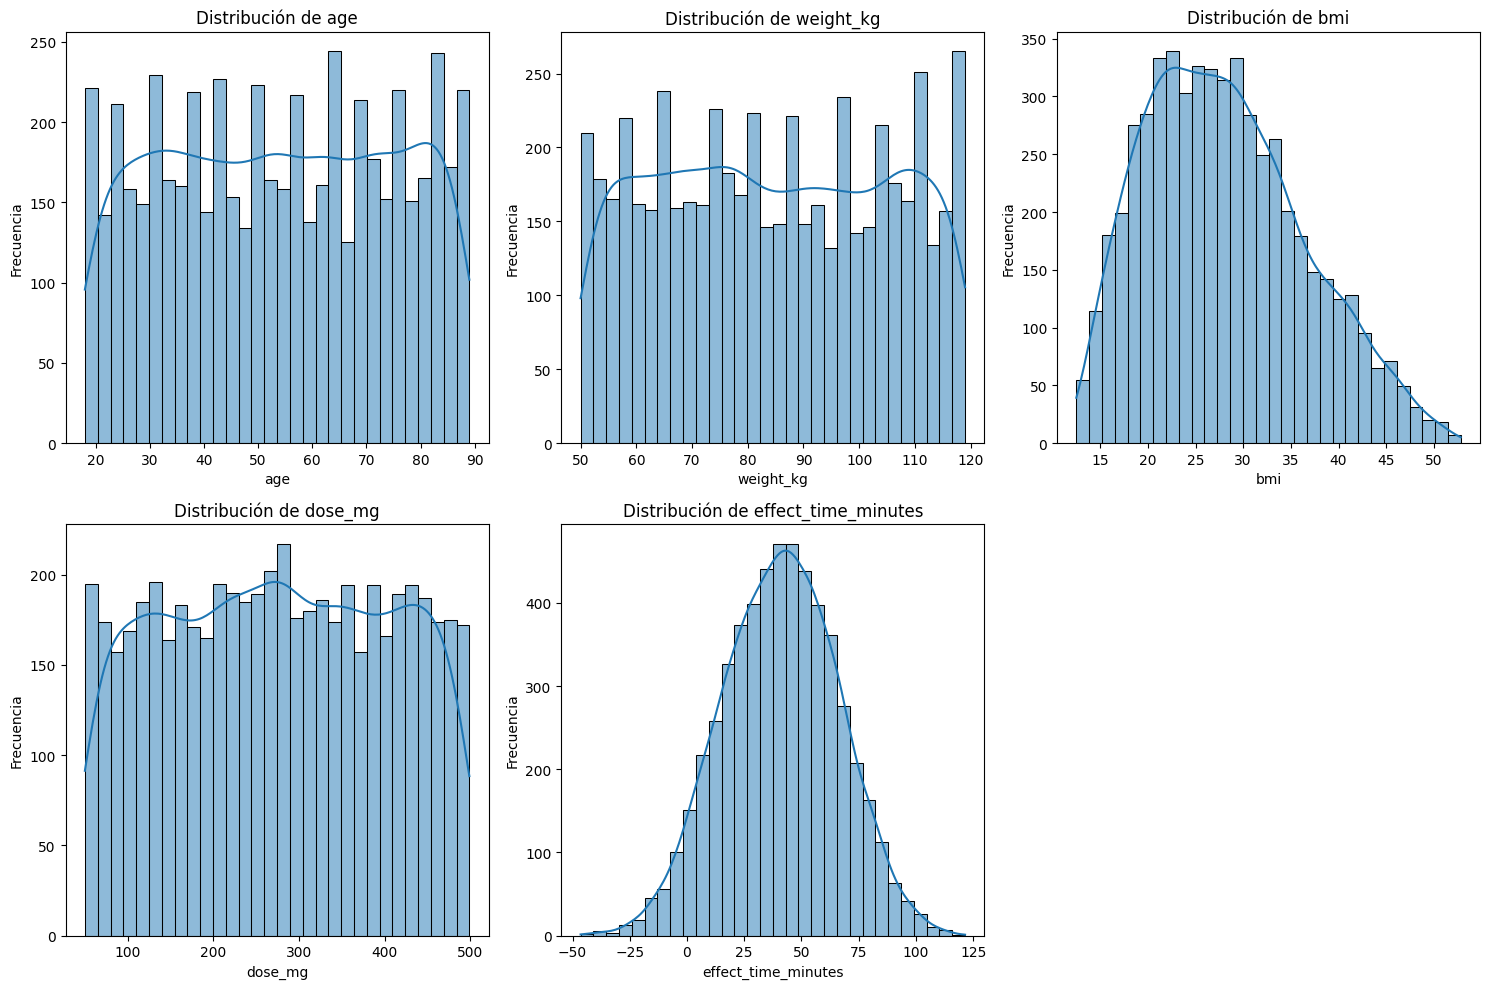

In [ ]:
"""
 Las variables numéricas no siguen una distribución normal, por lo que no se recomienda usar StandardScaler.
 Usamos RobustScaler porque es más robusto frente a outliers, que están presentes en el dataset.
 Para el modelado, se probarán algoritmos que no asumen linealidad ni normalidad:
 - RandomForestRegressor y AdaBoostRegressor: robustos, manejan bien datos no lineales y variables categóricas codificadas.
 - SVR (con kernel RBF): requiere buen escalado, útil si existe alguna relación no lineal suave.
 - LinearRegression: se incluirá como referencia, pero se espera peor rendimiento dado que muchas variables no tienen relación lineal con la variable objetivo.
"""

# Seleccionar solo las columnas numéricas de tipo int o float
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definir el número de columnas y filas para los subplots con 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Generar histogramas para cada variable numérica
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Histograma con línea KDE
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes vacíos si el número de variables es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlaciones con la variable objectivo

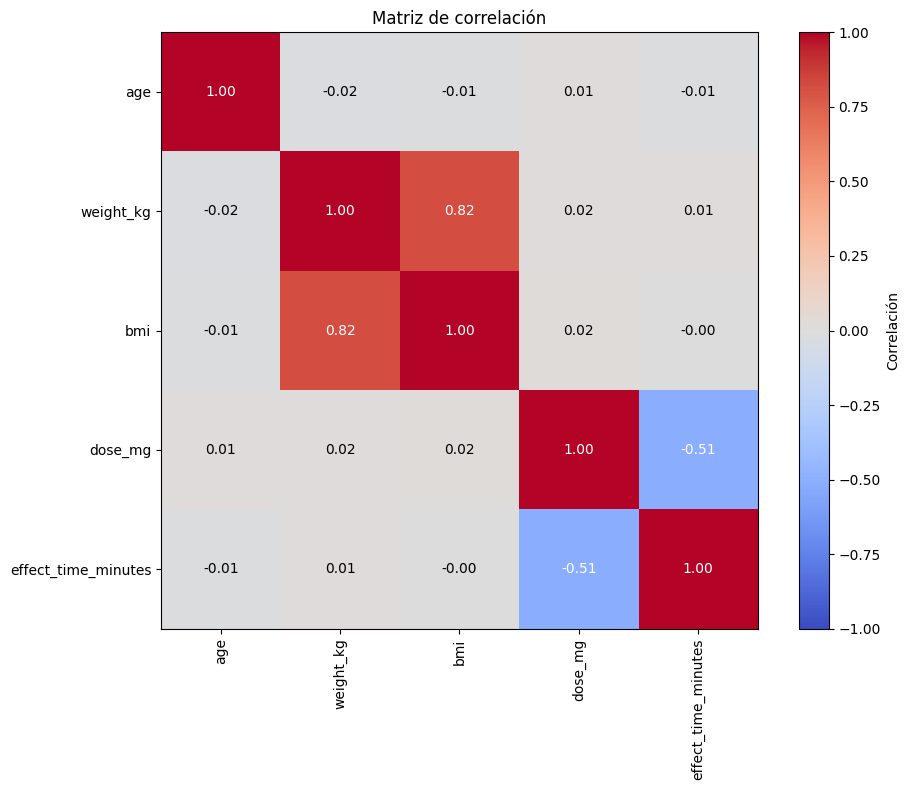

In [ ]:
"""
En general, el único predictor fuerte en términos de correlación lineal directa con la variable objetivo es dose_mg.
"""

# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=["float64", "int64"])

# Calcular matriz de correlación
correlation_matrix = df_numericas.corr()

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = df_numericas.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

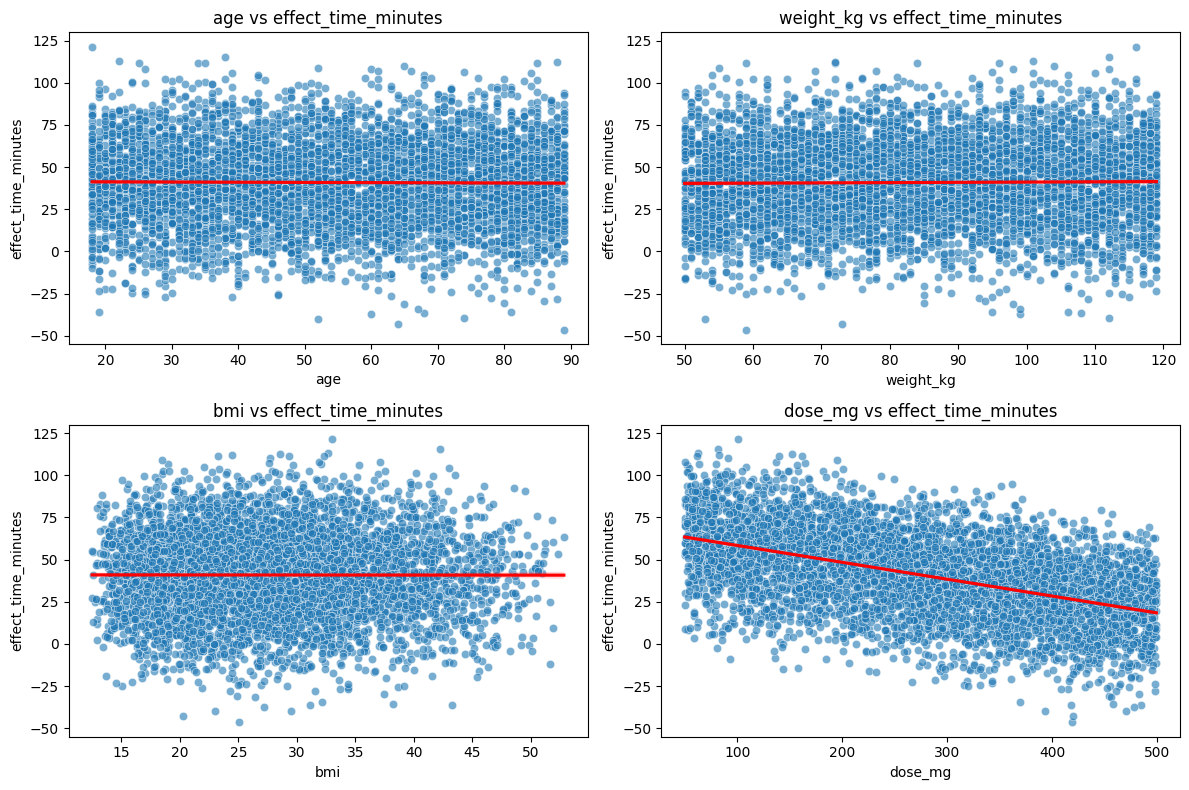

In [ ]:
"""
La imagen muestra claramente que dose_mg es la única variable numérica con una relación relevante y negativa con la variable objetivo effect_time_minutes.
A medida que aumenta la dosis, el medicamento parece hacer efecto más rápido.
Las otras variables estan muy dispersas.
"""
numeric_features = ['age', 'weight_kg', 'bmi', 'dose_mg']
target = 'effect_time_minutes'

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=feature, y=target, alpha=0.6)
    sns.regplot(data=df, x=feature, y=target, scatter=False, color='red')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

## Equilibrio

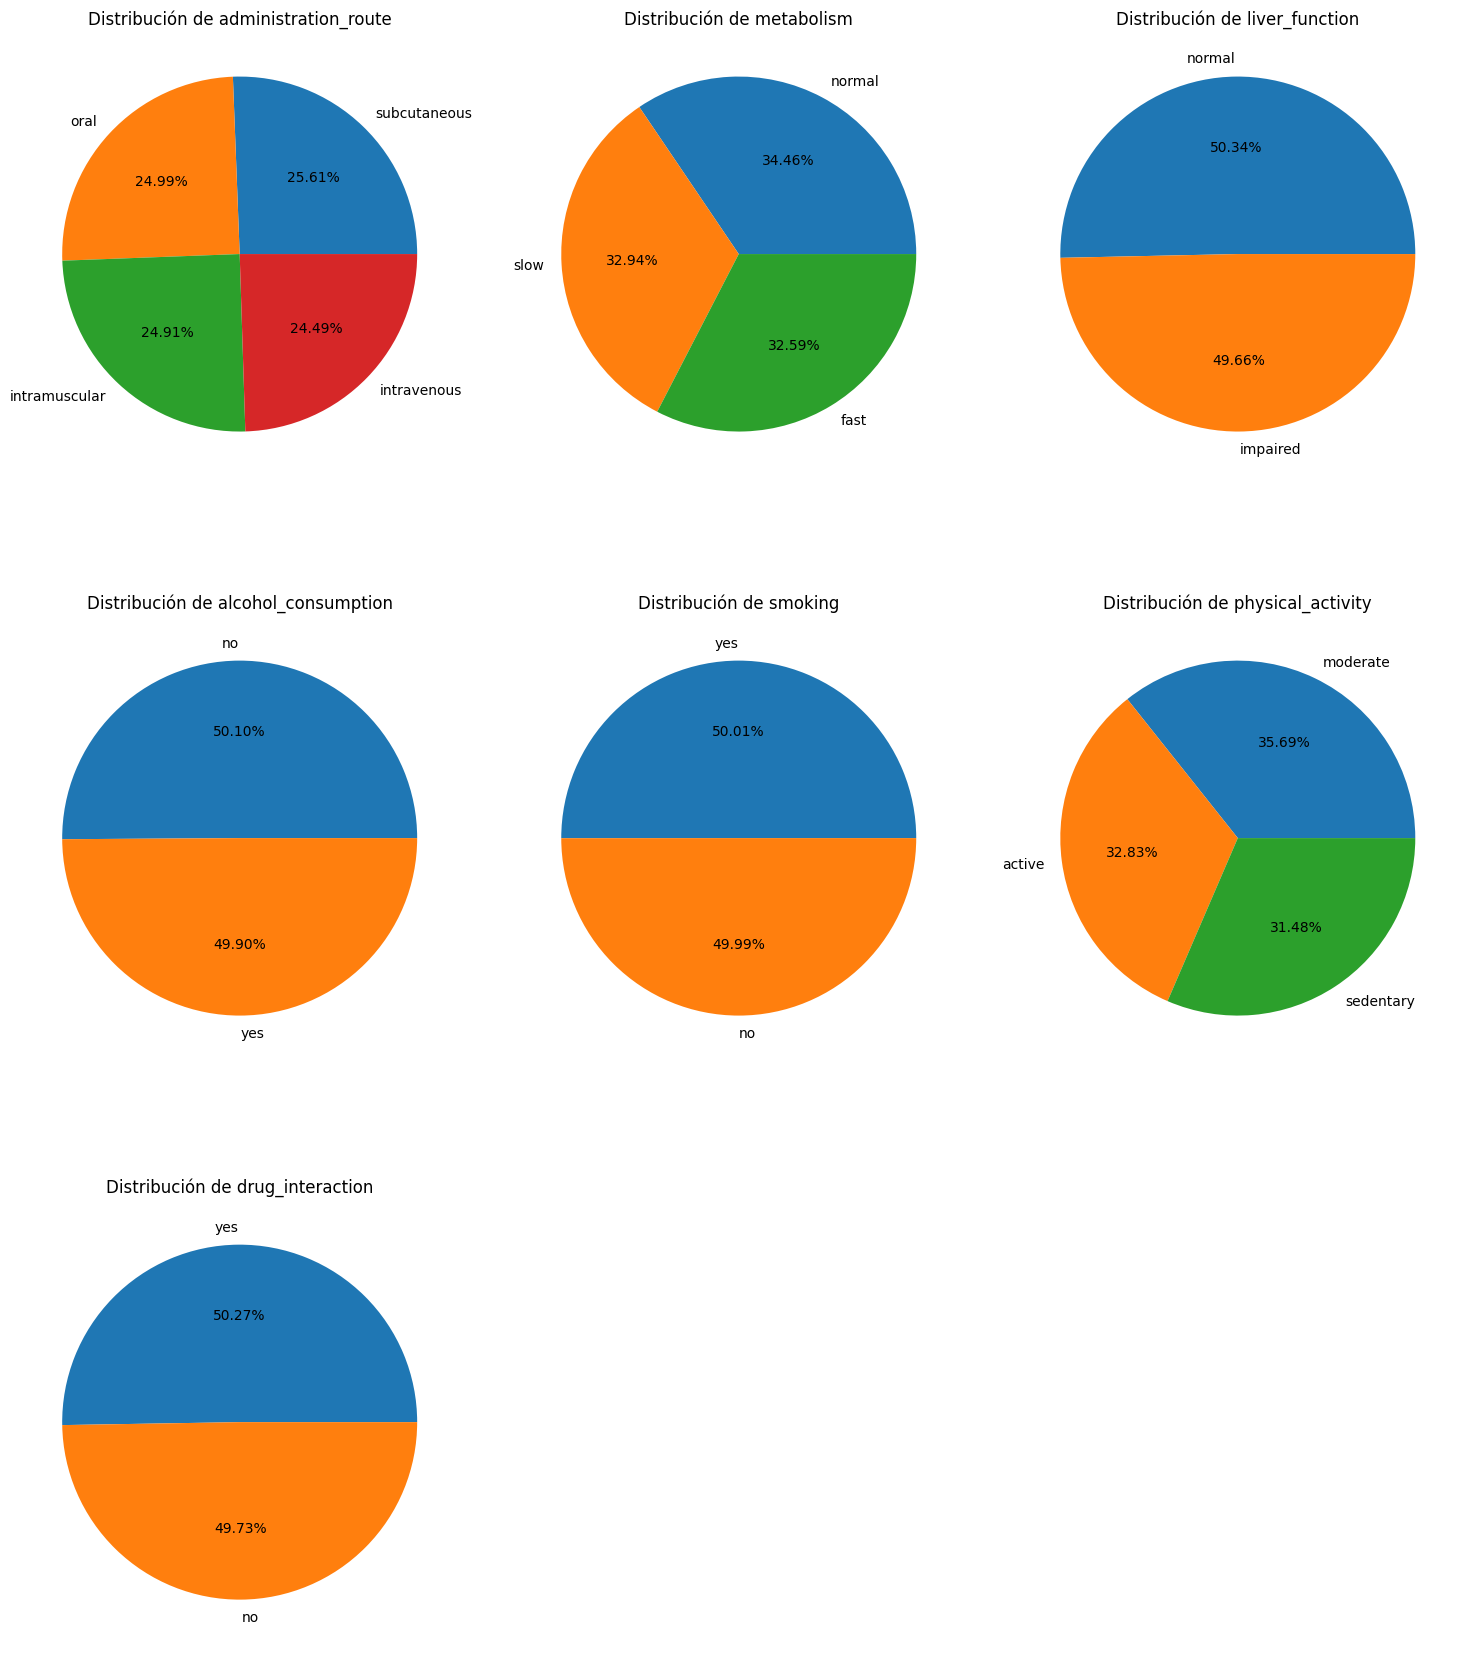

In [ ]:
# Comprobamos si las variables categóricas están equilibradas

import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(cat_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 6 * num_rows))

# Aplanar los ejes para facilitar el recorrido
axes = axes.flatten()

# Generar gráficos de sectores para cada variable categórica
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    labels = counts.index.astype(str)

    axes[i].pie(counts, labels=labels, autopct='%.2f%%')
    axes[i].set_title(f'Distribución de {col}')

# Ocultar ejes vacíos si hay menos categorías que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outliers

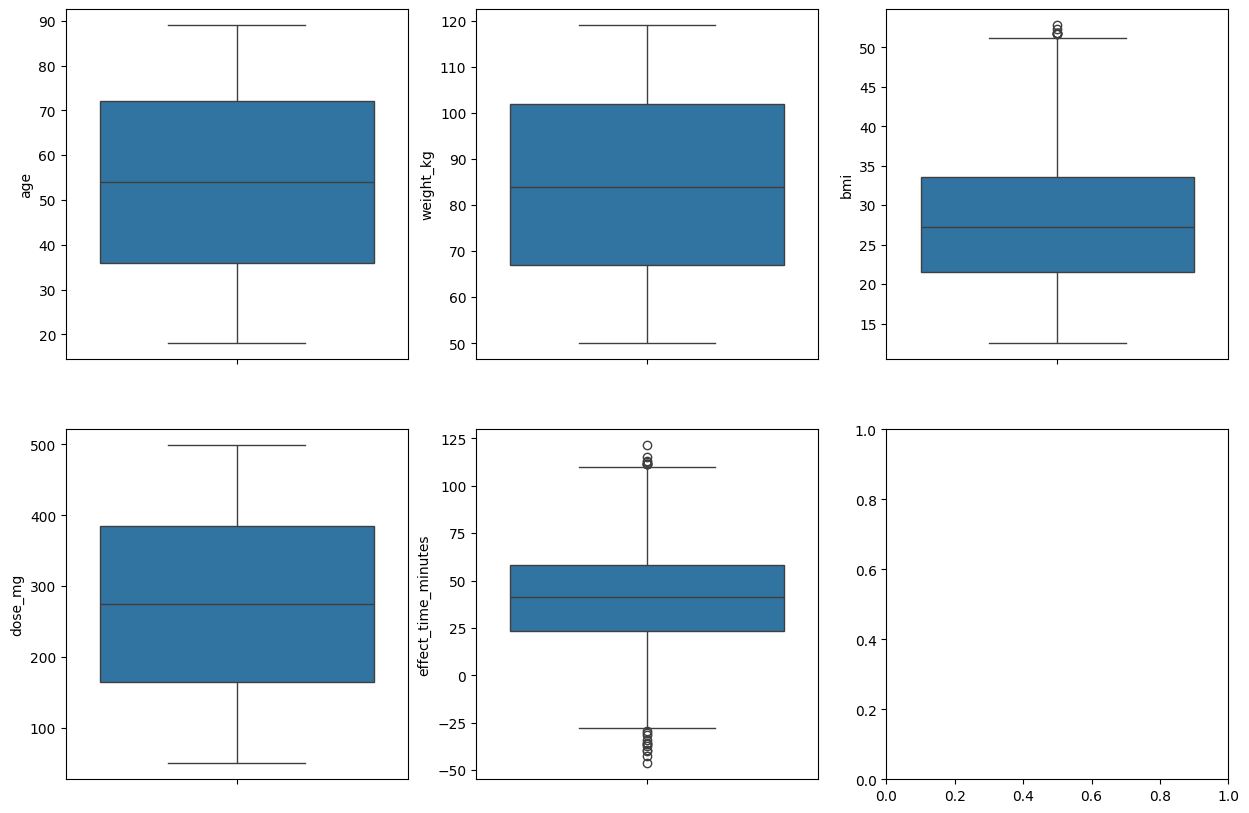

In [ ]:
# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Generar boxplots para cada variable numérica
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Contar el número de outliers por característica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el resultado
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
age                     0
weight_kg               0
bmi                     7
dose_mg                 0
effect_time_minutes    20
dtype: int64


In [ ]:
# Filtrar las filas que NO son outliers en ninguna columna
filtro_sin_outliers = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicar el filtro al DataFrame original
df = df[filtro_sin_outliers]

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Contar el número de outliers por característica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el resultado
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
age                    0
weight_kg              0
bmi                    0
dose_mg                0
effect_time_minutes    0
dtype: int64


# Fase 3: División de los datos

In [ ]:
# División previa de los datos del dataframe. X serán las características e y será la columna objetivo
X = df.drop('effect_time_minutes', axis=1)
y = df['effect_time_minutes']

In [ ]:
# División de los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encoders y escalado

In [ ]:
"""
LabelEncoder es una herramienta de Python que convierte etiquetas de texto en números enteros, especialmente para datos categóricos.
¡Y QUE NO TIENEN NINGÚN ORDEN NI RANGO ORDENADO!
"""

from sklearn.preprocessing import MinMaxScaler

# Definir columnas categóricas y numéricas (sin incluir la variable objetivo)
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

# Inicializar escalador
scaler = MinMaxScaler()

# Inicializar diccionario para guardar los LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder a las columnas categóricas (ajustar solo con el conjunto de entrenamiento)
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Aplicar StandardScaler a las columnas numéricas
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Mostrar las primeras filas para verificar
print(X_train.head())
print(X_test.head())

           age  weight_kg       bmi   dose_mg  administration_route  \
3593  0.816901   0.478261  0.340140  0.276169                     3   
2539  0.901408   0.956522  0.456449  0.933185                     1   
4175  0.126761   0.898551  0.576376  0.939866                     1   
905   0.605634   0.376812  0.529853  0.915367                     3   
3323  0.492958   0.768116  0.463169  0.608018                     3   

      metabolism  liver_function  alcohol_consumption  smoking  \
3593           1               1                    0        0   
2539           2               1                    1        1   
4175           2               0                    0        1   
905            1               0                    1        0   
3323           2               0                    0        1   

      physical_activity  drug_interaction  
3593                  1                 0  
2539                  1                 0  
4175                  1                 0  


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Regressión Líneal)

In [ ]:
# Inicialización del regresor
regresor_LR = LinearRegression()

# Entrenamiento del modelo
regresor_LR.fit(X_train, y_train)

# Realización de predicciones
predicciones_LR = regresor_LR.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_LR = r2_score(y_test, predicciones_LR)
mse_LR = mean_squared_error(y_test, predicciones_LR)
rmse_LR = np.sqrt(mse_LR)

print('R^2:', r2_LR)
print('RMSE:', rmse_LR)

R^2: 0.5265329889923889
RMSE: 16.763449975958995


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (SVR)

In [ ]:
# Inicialización del regresor
regresor_SVM = SVR()

# Entrenamiento del modelo
regresor_SVM.fit(X_train, y_train)

# Realización de predicciones
predicciones_SVM = regresor_SVM.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_SVM = r2_score(y_test, predicciones_SVM)
mse_SVM = mean_squared_error(y_test, predicciones_SVM)
rmse_SVM = np.sqrt(mse_SVM)

print('R^2:', r2_SVM)
print('RMSE:', rmse_SVM)

R^2: 0.6940969502173713
RMSE: 13.474431280031377


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (DT)

In [ ]:
# Inicialización del regresor
regresor_DT = DecisionTreeRegressor(random_state=42)

# Entrenamiento del modelo
regresor_DT.fit(X_train, y_train)

# Realización de predicciones
predicciones_DT = regresor_DT.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_DT = r2_score(y_test, predicciones_DT)
mse_DT = mean_squared_error(y_test, predicciones_DT)
rmse_DT = np.sqrt(mse_DT)

print('R^2:', r2_DT)
print('RMSE:', rmse_DT)

R^2: 0.591856863361091
RMSE: 15.564127838837324


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RF)

In [ ]:
# Inicializar el modelo de regresión Random Forest
regresor_RF = RandomForestRegressor(random_state=42)

# Entrenamiento del modelo
regresor_RF.fit(X_train, y_train)

# Realización de predicciones
predicciones_RF = regresor_RF.predict(X_test)

# Cálculo de métricas de rendimiento
r2_RF = r2_score(y_test, predicciones_RF)
mse_RF = mean_squared_error(y_test, predicciones_RF)
rmse_RF = np.sqrt(mse_RF)

print('R^2:', r2_RF)
print('RMSE:', rmse_RF)

R^2: 0.7855415352583934
RMSE: 11.282104985819615


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Adaboost)

In [ ]:
# Inicializar el modelo de regresión AdaBoost
regresor_AB = AdaBoostRegressor(random_state=42)

# Entrenamiento del modelo
regresor_AB.fit(X_train, y_train)

# Realización de predicciones
predicciones_AB = regresor_AB.predict(X_test)

# Cálculo de métricas de rendimiento
r2_AB = r2_score(y_test, predicciones_AB)
mse_AB = mean_squared_error(y_test, predicciones_AB)
rmse_AB = np.sqrt(mse_AB)

print('R^2:', r2_AB)
print('RMSE:', rmse_AB)

R^2: 0.7591227483500398
RMSE: 11.956840448750496


| Modelo               | R²       | RMSE      |
|----------------------|----------|-----------|
| Regresión Lineal     | 0.5265   | 16.76     |
| SVR                  | 0.6941   | 13.47     |
| Árbol de Decisión    | 0.5919   | 15.56     |
| Random Forest        | 0.7855   | 11.28     |
| AdaBoost Regressor   | 0.7591   | 11.95     |

El RMSE (Root Mean Squared Error) mide la diferencia promedio entre las predicciones del modelo y los valores reales, en las mismas unidades que la variable objetivo, en este caso minutos.

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Regresión Líneal)

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir la rejilla de valores para alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]
}

# Inicializar el modelo de regresión Ridge
regressor_RL2 = Ridge()

# Configurar búsqueda en rejilla con validación cruzada
grid_search_RL2 = GridSearchCV(
    estimator=regressor_RL2,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

# Ajustar el modelo sobre los datos de entrenamiento
grid_search_RL2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_RL2 = grid_search_RL2.best_estimator_

# Realizar predicciones
predicciones_RL2 = regressor_RL2.predict(X_test)

# Calcular métricas
r2_RL2 = r2_score(y_test, predicciones_RL2)
mse_RL2 = mean_squared_error(y_test, predicciones_RL2)
rmse_RL2 = np.sqrt(mse_RL2)

print('R^2:', r2_RL2)
print('RMSE:', rmse_RL2)

R^2: 0.5264810545041287
RMSE: 16.764369340247356


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (SVR)

In [ ]:
# Definir la rejilla de hiperparámetros
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inicializar el modelo SVR
regressor_SVR2 = SVR()

# Búsqueda en rejilla con validación cruzada
grid_search_SVR2 = GridSearchCV(regressor_SVR2, param_grid, cv=5, scoring='r2')
grid_search_SVR2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_SVR2 = grid_search_SVR2.best_estimator_

# Realizar predicciones
predicciones_SVR2 = regressor_SVR2.predict(X_test)

# Calcular métricas
r2_SVR2 = r2_score(y_test, predicciones_SVR2)
mse_SVR2 = mean_squared_error(y_test, predicciones_SVR2)
rmse_SVR2 = np.sqrt(mse_SVR2)

print('R^2:', r2_SVR2)
print('RMSE:', rmse_SVR2)

R^2: 0.8226289965342453
RMSE: 10.260295101822361


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (DT)

In [ ]:
import warnings

# Desactivar todos los avisos
warnings.filterwarnings("ignore")

# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'mae'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
regressor_DT2 = DecisionTreeRegressor(random_state=42)

# Búsqueda en rejilla con validación cruzada
grid_search_DT2 = GridSearchCV(estimator=regressor_DT2, param_grid=param_grid, cv=5)
grid_search_DT2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_DT2 = grid_search_DT2.best_estimator_
print("Mejores hiperparámetros:", grid_search_DT2.best_params_)

# Predicciones
predicciones_DT2 = regressor_DT2.predict(X_test)

# Métricas
r2_DT2 = r2_score(y_test, predicciones_DT2)
mse_DT2 = mean_squared_error(y_test, predicciones_DT2)
rmse_DT2 = np.sqrt(mse_DT2)

print('R^2:', r2_DT2)
print('RMSE:', rmse_DT2)

Mejores hiperparámetros: {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
R^2: 0.7424532233155325
RMSE: 12.363647085784304


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RF)

In [ ]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],              # Número de árboles en el bosque
    'criterion': ['absolute_error'],         # Método para calcular las divisiones
    'max_depth': [5, 10],                    # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2],                 # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']         # Número máximo de características a considerar
}

# Inicializar el modelo de Random Forest
regressor_RF2 = RandomForestRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_RF2 = GridSearchCV(
    estimator=regressor_RF2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_RF2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_RF2 = grid_search_RF2.best_estimator_
print("Mejores hiperparámetros:", grid_search_RF2.best_params_)

# Predicciones
predicciones_RF2 = regressor_RF2.predict(X_test)

# Métricas de rendimiento
r2_RF2 = r2_score(y_test, predicciones_RF2)
mse_RF2 = mean_squared_error(y_test, predicciones_RF2)
rmse_RF2 = np.sqrt(mse_RF2)

print('R^2:', r2_RF2)
print('RMSE:', rmse_RF2)

Mejores hiperparámetros: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
R^2: 0.7676878865241128
RMSE: 11.742335054927288


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Adaboost)

In [ ]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],                   # Número de iteraciones (modelos débiles)
    'learning_rate': [0.01, 0.1, 1.0],                # Tasa de aprendizaje
    'estimator': [DecisionTreeRegressor(max_depth=3)]  # Estimador base
}

# Inicializar el modelo de AdaBoost
regressor_AB2 = AdaBoostRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_AB2 = GridSearchCV(
    estimator=regressor_AB2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_AB2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_AB2 = grid_search_AB2.best_estimator_
print("Mejores hiperparámetros:", grid_search_AB2.best_params_)

# Predicciones
predicciones_AB2 = regressor_AB2.predict(X_test)

# Métricas de rendimiento
r2_AB2 = r2_score(y_test, predicciones_AB2)
mse_AB2 = mean_squared_error(y_test, predicciones_AB2)
rmse_AB2 = np.sqrt(mse_AB2)

print('R^2:', r2_AB2)
print('RMSE:', rmse_AB2)

Mejores hiperparámetros: {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 200}
R^2: 0.783187052406462
RMSE: 11.343867555498493


# Fase 8: Conclusiones

| Modelo              | R² Antes | RMSE Antes | R² Después | RMSE Después |
|---------------------|----------|------------|-------------|---------------|
| Regresión Lineal    | 0.5264   | 16.76      | 0.5264      | 16.76         |
| SVR                 | 0.6941   | 13.47      | 0.8226      | 10.26         |
| Árbol de Decisión   | 0.5916   | 15.56      | 0.7425      | 12.36         |
| Random Forest       | 0.7855   | 11.28      | 0.7677      | 11.74         |
| AdaBoost            | 0.7591   | 11.95      | 0.7831      | 11.34         |

# Fase 9: Pruebas

## Guardar el modelo

In [ ]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = regressor_SVR2

# Ruta donde guardar el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'

# Crear el directorio si no existe
os.makedirs(ruta, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/mejor_modelo.pkl


## Cargamos el modelo

In [ ]:
# Importar librerías necesarias
from google.colab import drive
import joblib
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardaste el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Cargar el modelo sin necesidad de volver a entrenarlo
mejor_modelo = joblib.load(ruta_modelo)
print("¡Modelo cargado correctamente!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Modelo cargado correctamente!


## Comprobación del sobreajuste

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='r2')
print(f"Media R² CV: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Media R² CV: 0.8183 - Desviación estándar: 0.0101


In [ ]:
# Predicciones del modelo
train_preds = mejor_modelo.predict(X_train)
test_preds = mejor_modelo.predict(X_test)

# Métricas de rendimiento en entrenamiento y test
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"R² entrenamiento: {train_r2:.4f}")
print(f"R² test: {test_r2:.4f}")
print(f"RMSE entrenamiento: {train_rmse:.4f}")
print(f"RMSE test: {test_rmse:.4f}")

R² entrenamiento: 0.8421
R² test: 0.8226
RMSE entrenamiento: 9.8821
RMSE test: 10.2603


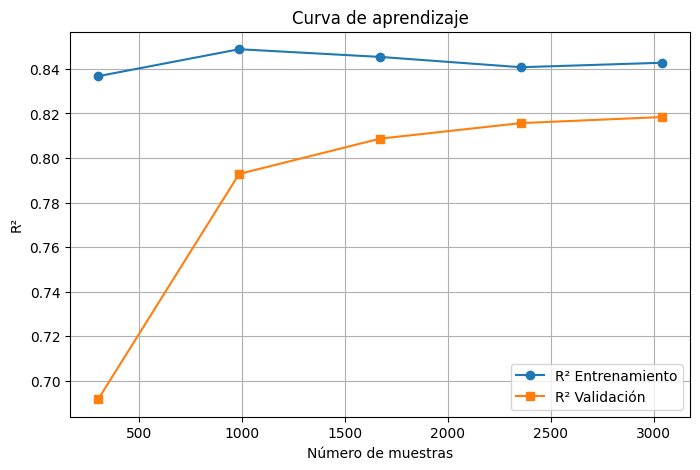

In [ ]:
from sklearn.model_selection import learning_curve

# Obtener las curvas de aprendizaje para regresión
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo, X_train, y_train, cv=5, scoring='r2'
)

# Calcular la media de las puntuaciones en entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='R² Entrenamiento', marker='o')
plt.plot(train_sizes, test_mean, label='R² Validación', marker='s')
plt.xlabel('Número de muestras')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplos curvas de aprendizaje

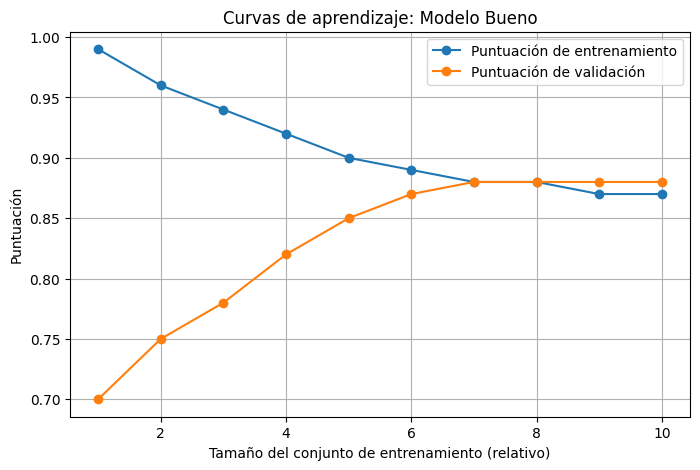

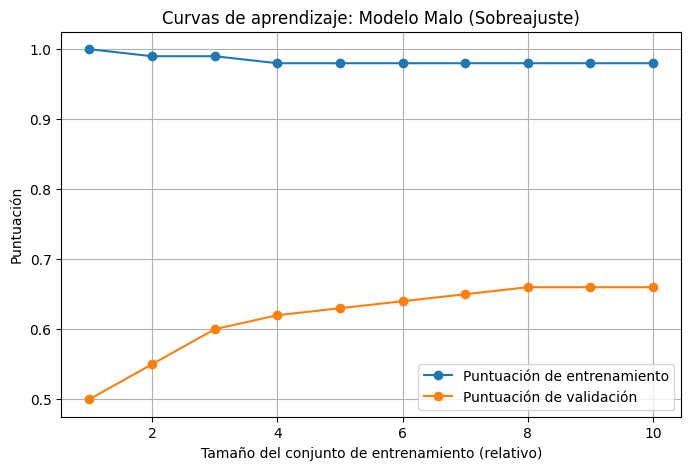

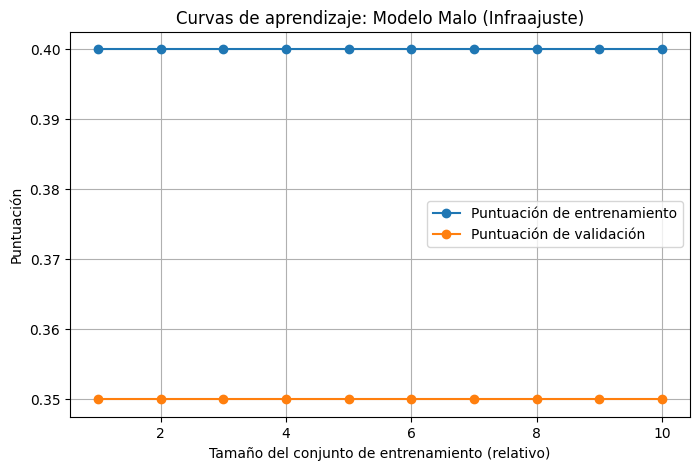

In [ ]:
# Simulación de tamaños del conjunto de entrenamiento (relativos)
train_sizes = np.arange(1, 11)  # 10 puntos

# Modelo bueno: convergencia de las curvas
train_scores_good = np.array([0.99, 0.96, 0.94, 0.92, 0.90, 0.89, 0.88, 0.88, 0.87, 0.87])
val_scores_good   = np.array([0.70, 0.75, 0.78, 0.82, 0.85, 0.87, 0.88, 0.88, 0.88, 0.88])

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_good, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_good, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Bueno")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

# Modelo malo (sobreajuste): puntuación de entrenamiento alta, validación baja
train_scores_bad = np.array([1.0, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])
val_scores_bad   = np.array([0.50, 0.55, 0.60, 0.62, 0.63, 0.64, 0.65, 0.66, 0.66, 0.66])

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_bad, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_bad, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Malo (Sobreajuste)")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

# Definir tamaños relativos del conjunto de entrenamiento
train_sizes = np.arange(1, 11)  # 10 puntos

# Ejemplo de infraajuste: ambas curvas bajas y casi constantes
train_scores_under = np.array([0.40] * 10)
val_scores_under   = np.array([0.35] * 10)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_under, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_under, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Malo (Infraajuste)")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

## Más pruebas

In [ ]:
# Hacer predicciones con el mejor modelo
predicciones = mejor_modelo.predict(X_test)

# Mostrar los 25 primeros tiempos reales, predicciones, diferencias y porcentaje de error
for i in range(25):
    tiempo_real = y_test.values[i]
    tiempo_predicho = predicciones[i]

    diferencia = tiempo_real - tiempo_predicho
    error_porcentual = abs(diferencia / tiempo_real) * 100  # Cálculo del error porcentual

    print(f"{i+1}: Tiempo real: {tiempo_real:.2f} - Tiempo predicho: {tiempo_predicho:.2f} - "
          f"Diferencia: {diferencia:.2f} - Error: {error_porcentual:.2f}%")

1: Tiempo real: 25.13 - Tiempo predicho: 16.90 - Diferencia: 8.23 - Error: 32.76%
2: Tiempo real: 59.06 - Tiempo predicho: 51.16 - Diferencia: 7.90 - Error: 13.38%
3: Tiempo real: 18.04 - Tiempo predicho: 28.19 - Diferencia: -10.15 - Error: 56.29%
4: Tiempo real: 45.61 - Tiempo predicho: 55.51 - Diferencia: -9.90 - Error: 21.72%
5: Tiempo real: 40.65 - Tiempo predicho: 26.65 - Diferencia: 14.00 - Error: 34.44%
6: Tiempo real: 5.64 - Tiempo predicho: 12.06 - Diferencia: -6.42 - Error: 113.82%
7: Tiempo real: 66.17 - Tiempo predicho: 52.17 - Diferencia: 14.00 - Error: 21.16%
8: Tiempo real: 52.73 - Tiempo predicho: 72.21 - Diferencia: -19.48 - Error: 36.94%
9: Tiempo real: 69.26 - Tiempo predicho: 59.50 - Diferencia: 9.76 - Error: 14.09%
10: Tiempo real: 81.72 - Tiempo predicho: 79.82 - Diferencia: 1.90 - Error: 2.33%
11: Tiempo real: 40.94 - Tiempo predicho: 44.58 - Diferencia: -3.64 - Error: 8.89%
12: Tiempo real: 67.07 - Tiempo predicho: 65.25 - Diferencia: 1.82 - Error: 2.72%
13: Tie

### Criterios para valorar el error porcentual en regresión

| Nivel        | Rango de error      | Interpretación                                                                 |
|--------------|---------------------|---------------------------------------------------------------------------------|
| ✔️ Bueno     | Menos del 10%        | Predicción muy ajustada. El modelo funciona de forma óptima.                   |
| ➖ Aceptable | Entre 10% y 30%      | El modelo capta la tendencia, aunque con cierta imprecisión.                   |
| ❌ Malo      | Más del 30%          | Error elevado. El modelo no generaliza bien o hay casos atípicos o ruido.      |

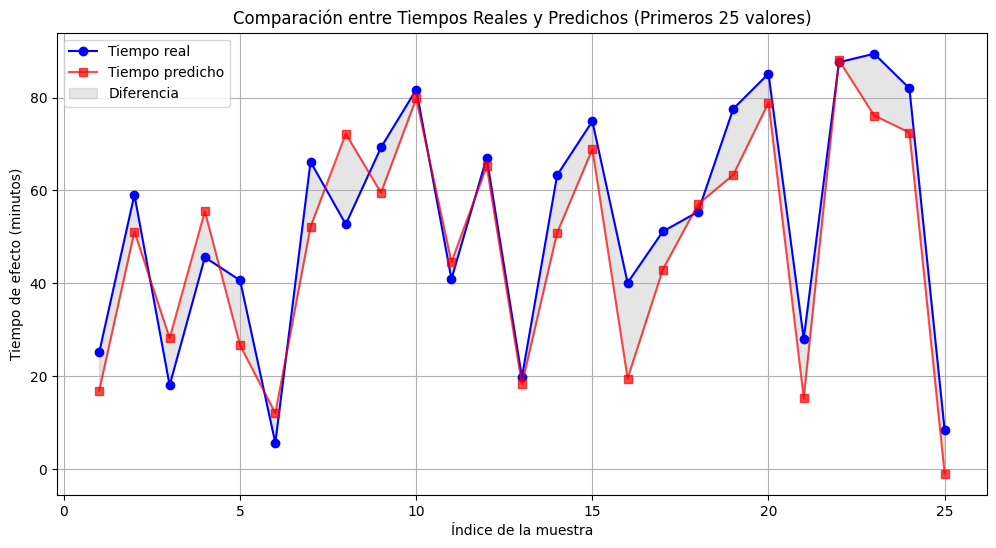

In [ ]:
# Tomamos los primeros 25 valores
tiempos_reales_25 = y_test.values[:25]  # Tiempos reales
tiempos_predichos_25 = predicciones[:25]  # Tiempos predichos por el modelo
indices = list(range(1, 26))

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(indices, tiempos_reales_25, marker='o', linestyle='-', label='Tiempo real', color='blue')
plt.plot(indices, tiempos_predichos_25, marker='s', linestyle='-', label='Tiempo predicho', color='red', alpha=0.7)
plt.fill_between(indices, tiempos_reales_25, tiempos_predichos_25, color='gray', alpha=0.2, label='Diferencia')

# Configuración del gráfico
plt.xlabel("Índice de la muestra")
plt.ylabel("Tiempo de efecto (minutos)")
plt.title("Comparación entre Tiempos Reales y Predichos (Primeros 25 valores)")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

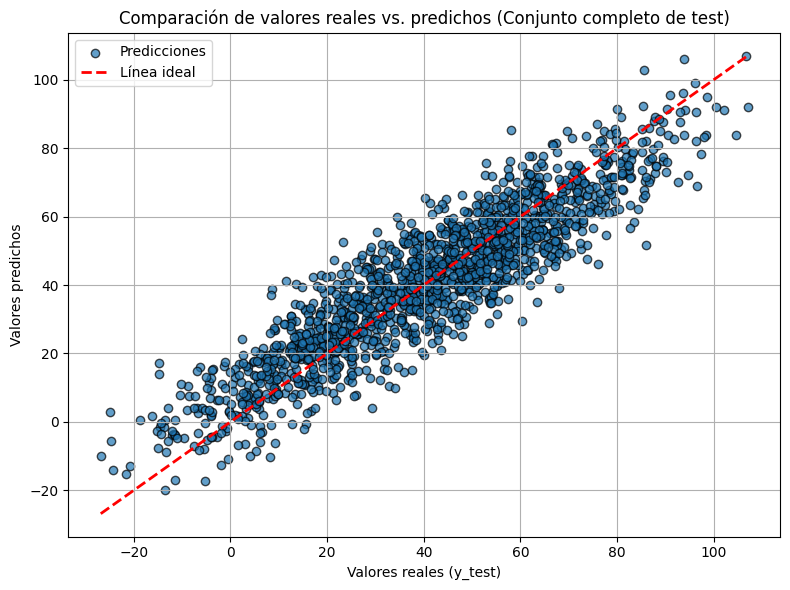

In [ ]:
"""
El modelo generaliza bien y presenta un ajuste fuerte con buen comportamiento predictivo.
El patrón indica un modelo robusto, aunque con posibles mejoras en la predicción de casos extremos o valores bajos.
"""
# Crear el gráfico de dispersión para todo el conjunto de test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, alpha=0.7, edgecolors='k', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea ideal")

# Configuración del gráfico
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Valores predichos')
plt.title('Comparación de valores reales vs. predichos (Conjunto completo de test)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

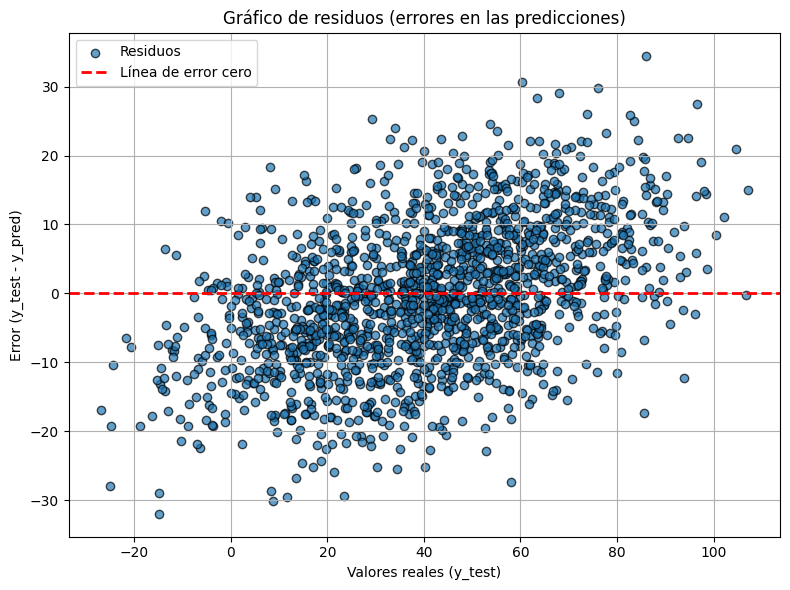

In [ ]:
"""
El modelo presenta un comportamiento estable y sin sesgo evidente,
aunque con algo más de error en los extremos.
Sería adecuado revisar si los outliers influyen negativamente en la métrica global.
"""
# Calcular los errores (residuos)
residuos = y_test - predicciones  # Diferencia entre valores reales y predicciones

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuos, alpha=0.7, edgecolors='k', label="Residuos")
plt.axhline(y=0, color='r', linestyle='--', lw=2, label="Línea de error cero")

# Configuración del gráfico
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Error (y_test - y_pred)')
plt.title('Gráfico de residuos (errores en las predicciones)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# PRUEBA FINAL - regressor_AB2

In [ ]:
# Hacer predicciones con el mejor modelo
predicciones = regressor_AB2.predict(X_test)

# Mostrar los 25 primeros tiempos reales, predicciones, diferencias y porcentaje de error
for i in range(25):
    tiempo_real = y_test.values[i]
    tiempo_predicho = predicciones[i]

    diferencia = tiempo_real - tiempo_predicho
    error_porcentual = abs(diferencia / tiempo_real) * 100  # Cálculo del error porcentual

    print(f"{i+1}: Tiempo real: {tiempo_real:.2f} - Tiempo predicho: {tiempo_predicho:.2f} - "
          f"Diferencia: {diferencia:.2f} - Error: {error_porcentual:.2f}%")

1: Tiempo real: 25.13 - Tiempo predicho: 15.93 - Diferencia: 9.20 - Error: 36.61%
2: Tiempo real: 59.06 - Tiempo predicho: 54.97 - Diferencia: 4.09 - Error: 6.92%
3: Tiempo real: 18.04 - Tiempo predicho: 29.11 - Diferencia: -11.07 - Error: 61.36%
4: Tiempo real: 45.61 - Tiempo predicho: 55.12 - Diferencia: -9.51 - Error: 20.84%
5: Tiempo real: 40.65 - Tiempo predicho: 26.14 - Diferencia: 14.51 - Error: 35.69%
6: Tiempo real: 5.64 - Tiempo predicho: 23.45 - Diferencia: -17.81 - Error: 315.75%
7: Tiempo real: 66.17 - Tiempo predicho: 55.30 - Diferencia: 10.87 - Error: 16.43%
8: Tiempo real: 52.73 - Tiempo predicho: 74.71 - Diferencia: -21.98 - Error: 41.68%
9: Tiempo real: 69.26 - Tiempo predicho: 63.26 - Diferencia: 6.00 - Error: 8.67%
10: Tiempo real: 81.72 - Tiempo predicho: 76.81 - Diferencia: 4.91 - Error: 6.00%
11: Tiempo real: 40.94 - Tiempo predicho: 47.99 - Diferencia: -7.05 - Error: 17.23%
12: Tiempo real: 67.07 - Tiempo predicho: 56.67 - Diferencia: 10.40 - Error: 15.50%
13: T

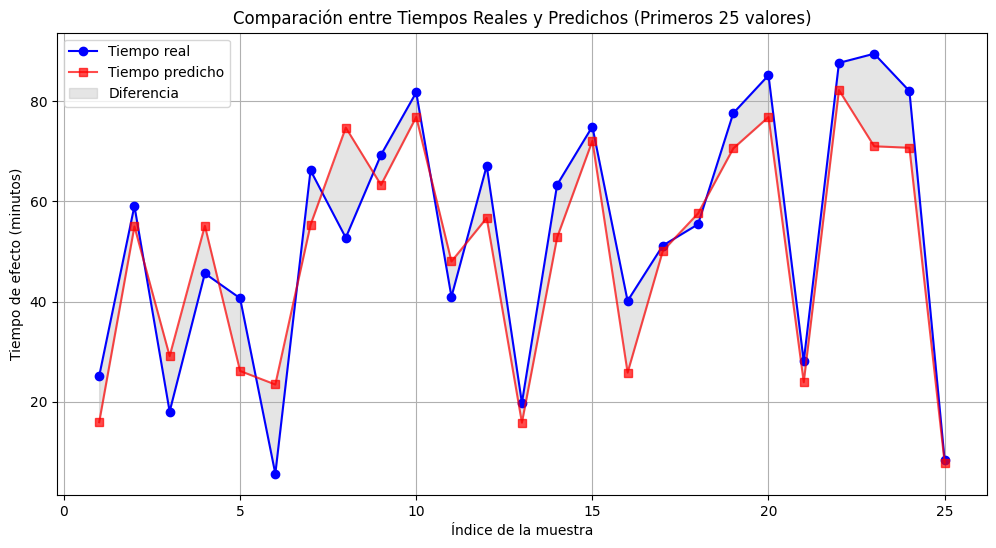

In [ ]:
# Tomamos los primeros 25 valores
tiempos_reales_25 = y_test.values[:25]  # Tiempos reales
tiempos_predichos_25 = predicciones[:25]  # Tiempos predichos por el modelo
indices = list(range(1, 26))

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(indices, tiempos_reales_25, marker='o', linestyle='-', label='Tiempo real', color='blue')
plt.plot(indices, tiempos_predichos_25, marker='s', linestyle='-', label='Tiempo predicho', color='red', alpha=0.7)
plt.fill_between(indices, tiempos_reales_25, tiempos_predichos_25, color='gray', alpha=0.2, label='Diferencia')

# Configuración del gráfico
plt.xlabel("Índice de la muestra")
plt.ylabel("Tiempo de efecto (minutos)")
plt.title("Comparación entre Tiempos Reales y Predichos (Primeros 25 valores)")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

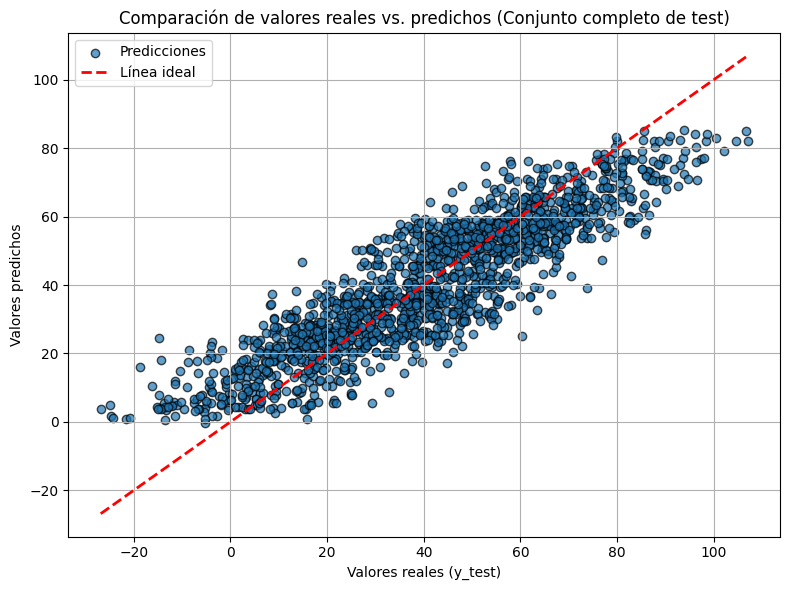

In [ ]:
"""
En esta gráfica también se aprecia una mejora clara. La nube de puntos predichos se alinea mucho mejor con la línea roja (ideal),
especialmente en el rango medio de valores. La dispersión es más contenida y simétrica a ambos lados de la línea, lo que indica un buen ajuste.

A diferencia de modelos anteriores, aquí se ve menos sesgo sistemático y más precisión global,
 aunque todavía hay margen de mejora en los extremos inferiores y superiores.
"""

# Crear el gráfico de dispersión para todo el conjunto de test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, alpha=0.7, edgecolors='k', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea ideal")

# Configuración del gráfico
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Valores predichos')
plt.title('Comparación de valores reales vs. predichos (Conjunto completo de test)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Nuevas predicciones con AB2

In [ ]:
# Predicción del dataset 66,48
# Ejemplo de nueva observación (sin la variable objetivo)
nueva_observacion = pd.DataFrame({
    'age': [69],
    'weight_kg': [115],
    'bmi': [31.35],
    'dose_mg': [273],
    'administration_route': ['subcutaneous'],
    'metabolism': ['normal'],
    'liver_function': ['impaired'],
    'alcohol_consumption': ['yes'],
    'smoking': ['yes'],
    'physical_activity': ['sedentary'],
    'drug_interaction': ['yes']
})

# Aplicar los LabelEncoders guardados en el diccionario
for col in cat_cols:
    nueva_observacion[col] = label_encoders[col].transform(nueva_observacion[col])

# Aplicar el mismo MinMaxScaler a las columnas numéricas
nueva_observacion[num_cols] = scaler.transform(nueva_observacion[num_cols])

# Realizar la predicción con el modelo entrenado
prediccion_nueva = regressor_AB2.predict(nueva_observacion)
print(f"Predicción (effect_time_minutes) para la nueva observación: {prediccion_nueva[0]:.2f}")

In [ ]:
# Predicción del dataset 11,32
# Ejemplo de nueva observación (sin la variable objetivo)
nueva_observacion = pd.DataFrame({
    'age': [32],
    'weight_kg': [72],
    'bmi': [21.13],
    'dose_mg': [273],
    'administration_route': ['intravenous'],
    'metabolism': ['fast'],
    'liver_function': ['normal'],
    'alcohol_consumption': ['no'],
    'smoking': ['yes'],
    'physical_activity': ['sedentary'],
    'drug_interaction': ['yes']
})

# Aplicar los LabelEncoders guardados en el diccionario
for col in cat_cols:
    nueva_observacion[col] = label_encoders[col].transform(nueva_observacion[col])

# Aplicar el mismo MinMaxScaler a las columnas numéricas
nueva_observacion[num_cols] = scaler.transform(nueva_observacion[num_cols])

# Realizar la predicción con el modelo entrenado
prediccion_nueva = regressor_AB2.predict(nueva_observacion)
print(f"Predicción (effect_time_minutes) para la nueva observación: {prediccion_nueva[0]:.2f}")

Predicción (effect_time_minutes) para la nueva observación: 10.48
